In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import mpmath as mp

In [4]:
#Definición de unidades
    #Escalas
um=1e-6
mm=1e-3
nm=1e-9
    #Tamaño imagen
N=200
M=200
    #longitud de onda
w_length=632*nm
    #Tamaño de pixel
dx=dy=1*um #equivalencia con el mundo físico

In [5]:
#Espectro angular.
def A_apx(U_f,dx_f,dy_f,z_f,wave_length):
    U_freq=np.fft.fftshift(np.fft.fft2(U_f))
    
    N_f,M_f=np.shape(U_f) #The shape of an array is the number of elements in each dimension
    x=np.arange(-int(M_f/2),int(M_f/2),1) #arreglo desde -la mitad del número de elementos que tenga cada dimensión
    y=np.arange(-int(N_f/2),int(N_f/2),1) #hasta la mitad de número de elementos en cada dimensión, con pasos de a 1.
    X,Y=np.meshgrid(x,y) #Return coordinate matrices from coordinate vectors.
    
     #dimensionando
    fX=X*(1/(M_f*dx_f)) 
    fY=Y*(1/(N_f*dy_f))
    
    k= 2*np.pi/wave_length
    C1 = 1j*z_f*k

    matriz = np.exp(C1*np.sqrt(1-(wave_length**2)*((fX**2)+(fY**2))))

    freq_p = U_freq*matriz
    #plt.figure()
    #plt.imshow(np.angle(
    #matriz))
        
    #plt.show()
    
    return freq_p

1.0


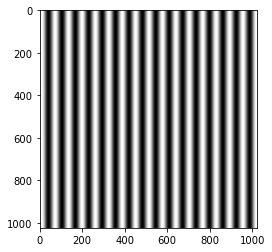

In [6]:
### Punto 2.a Efecto talbot
### Ajustar a implementación utilizada

#Tamaño del [p0]ixel en el plano de entrada
p0=1*um ##Ajustar a unidades
# Factor de contraste 0<=m<=1 
m=1
#hacer rejilla
## Auxiliar ## 
P=1024
x = np.arange(-P*p0/2, P*p0/2, p0) ## P es el numero de pixeles
y = np.arange(-P*p0/2, P*p0/2, p0)
xx, yy = np.meshgrid(x, y, sparse=True)
#Dibujar rejilla 1D
L=63*um ## Ajustar a unidades 

rejilla_1D = 1/2*(1+m*np.cos(2*np.pi*xx/L+0*yy)) 

#plt.gray()
#plt.imsave('rejilla_1D.png', rejilla_1D) #Guardar imagen
#plt.imshow(rejilla_1D) #Mostrar 100-1 pixeles
#plt.imshow(rejilla_1D[0:10,0:10], cmap='gray')
#plt.show()
print(np.max(rejilla_1D))
plt.imshow(rejilla_1D, cmap='gray',vmin=0,vmax=1)
plt.show()

In [85]:
np.shape(rejilla_1D)

(128, 128)

1.0440703216450122


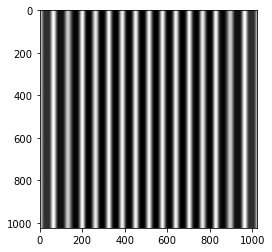

In [8]:
## Formación de autoimagen positiva
w_lentgth=630*nm ##longitud de onda 
N=2 ## valor N par
## calcular la distancia de talbot
Z2=N*((L**2)/w_lentgth)
f_prop= A_apx(rejilla_1D,dx,dy,Z2,w_length) ## propagación por espectro angular
fin=np.fft.ifft2(f_prop)
fin2=(np.abs(fin))**2
#plt.figure()
#plt.imshow(fin2[0:10,0:10], cmap='gray')
#plt.show()
## Mostrar autoimagen
print(np.max(fin2)) ##valor de irradiancia de la autoimagen
plt.imshow(fin2, cmap='gray',vmin=0,vmax=1.044)
plt.show()

1.0834610220211323


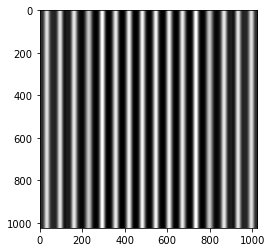

In [9]:
## Formación de autoimagen negativa
w_lentgth=630*nm ##longitud de onda 
N=3 ## valor N impar
## calcular la distancia de talbot
Z2=N*((L**2)/w_lentgth)
f_prop= A_apx(rejilla_1D,dx,dy,Z2,w_length) ## propagación por espectro angular
fin=np.fft.ifft2(f_prop)
fin2=(np.abs(fin))**2
#plt.figure()
#plt.imshow(fin2[0:10,0:10], cmap='gray')
#plt.show()
## Mostrar autoimagen
print(np.max(fin2)) ##valor de irradiancia de la autoimagen
plt.imshow(fin2, cmap='gray',vmin=0,vmax=1.044)
plt.show()